In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/archive.zip

Archive:  gdrive/My Drive/archive.zip
replace Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Reviews.csv             
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         
replace hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hashes.txt              


In [ ]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px# Product Scoresfig =
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()


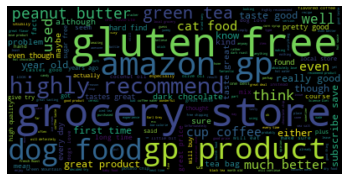

In [ ]:
import nltk
from nltk.corpus import stopwords# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating
> 3 else -1)

In [ ]:
df.head()

In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]


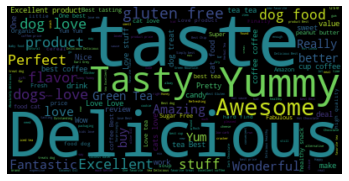

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
def remove_punctuation(text):
 final = "".join(u for u in text if u not in ("?", ".", ";",":", "!",'"'))
 return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()


,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


In [ ]:
# random split train and test 
import numpy as np
dataindex = df.index
df['random_number'] = np.random.randn(len(dataindex))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']


In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = lr.predict(X_test)


In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)


array([[17442,  3906],
       [ 8900, 89915]])

In [ ]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

          -1       0.66      0.82      0.73     21348
           1       0.96      0.91      0.93     98815

    accuracy                           0.89    120163
   macro avg       0.81      0.86      0.83    120163
weighted avg       0.91      0.89      0.90    120163

